# Machine Learning Example - Titanic Dataset

![titanic ship](./media/RMS_Titanic_3.jpg)

On April 15, 1912 the RMS Titanic British passenger liner sank in the North Atlantic Ocean after striking an iceberg during her maiden voyage from England to New York City.  

Of the 2,224 passengers and crew aboard 1502 died.  

While there was some element of luck involved in surviving, it seems that some groups of people were more likely to survive than others.

Using the known passenger list and survival status, can we create a model to predict who might survive the Titanic disaster.

Kaggle semi-fictitious data set

https://www.kaggle.com/c/titanic


# Gather / Collect Data

## Titanic Dataset from Kaggle

Kaggle is a website that hosts machine learning datasets and competitions.  It is a wonderful resource to learn about machine learning.

We are going to use the Titanic Kaggle Data Set

https://www.kaggle.com/c/titanic

![data_dictionary](./media/data_dictionary.png)

# Explore, Visualize, Analyze the data

To analyze the data, we will use the Pandas package

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/titanic_train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check for missing values

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import seaborn as sns

## Chart 'Survived' value

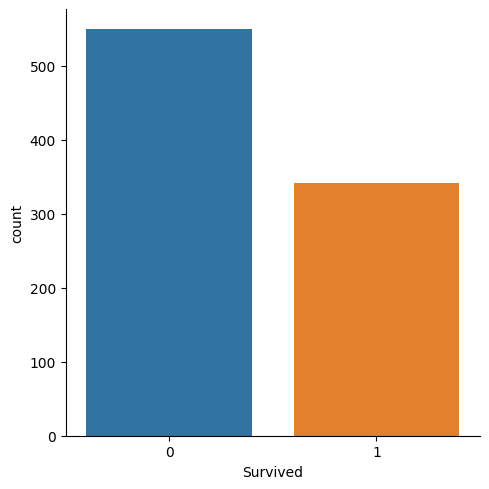

In [7]:
sns.catplot(x="Survived", kind="count", data=df)

We can see that more people did not survive than did survive.

Lets break down the survived and not survived by some other attributes like Sex and Age.

## Chart Survived status by Sex

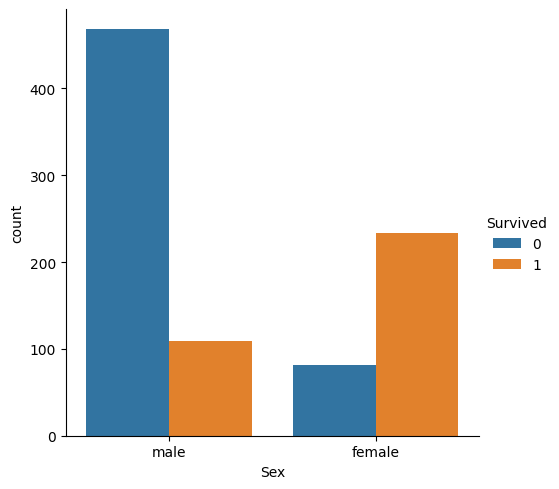

In [8]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)

## Chart Survived by age group

In [9]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [10]:
bin_labels = ['children', 'teens', 'young adult', 'adult', 'older adult', 'senior']
#   0-12:  Children
#  13-19:  Teens
#  20-29:  Young Adults
#  30-49:  Adults
#  50-64:  Older Adults
# 65-100:  Seniors
bins = [0, 12, 19, 29, 49, 64, 100]

df['age_bins'] = pd.cut(df['Age'], bins=bins, labels=bin_labels)

In [11]:
df['age_bins'].value_counts()

adult          256
young adult    220
teens           95
children        69
older adult     63
senior          11
Name: age_bins, dtype: int64

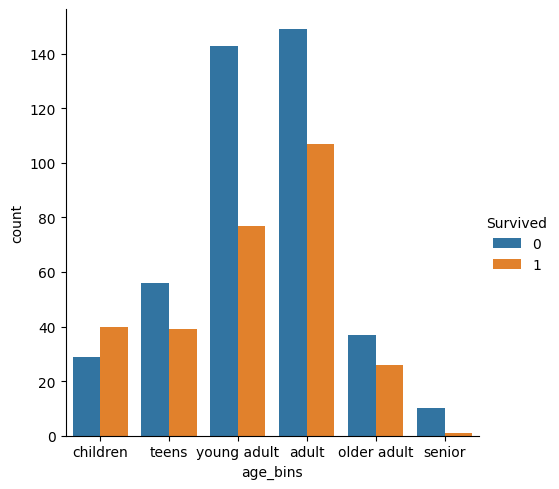

In [12]:
sns.catplot(x="age_bins", hue="Survived", kind="count", data=df)

We can see that the ONLY age group that had more survivors and non-survivors is the 'children' age group

## Chart age bins by Sex

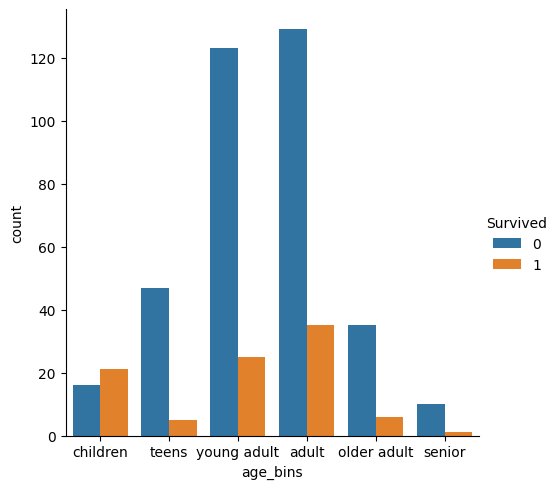

In [13]:
sns.catplot(x="age_bins", hue="Survived", kind="count", data=df.query("Sex=='male'"))

Here we can see for males, there are still more children surviors than non-survivors.  However in every other age group many more men did not survive than did survive.

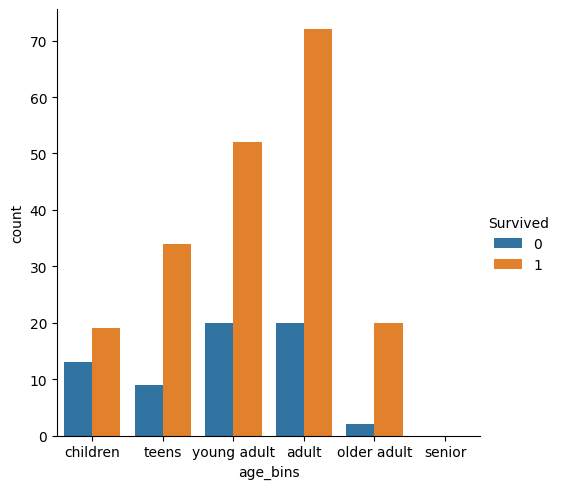

In [14]:
sns.catplot(x="age_bins", hue="Survived", kind="count", data=df.query("Sex=='female'"))

Here we can see for females, there are still more children surviors than non-surviors.  However, in every other group many more females DID survive unlike what we just saw for males.

## Chart Survival by passenger class

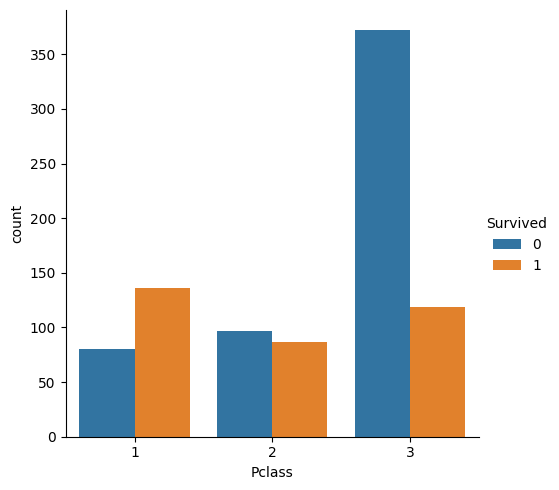

In [15]:
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df)

This chart clearly shows that more first class passengers survived than did third class passengers

## What can we conclude from this analysis?

<b>"Women and children first"</b>

https://www.mentalfloss.com/posts/women-and-children-first-origins-titanic

```
The practice of “women and children first” was popularized in 1852, 60 years before Titanic sank. 

Early that year, the HMS Birkenhead departed from South Africa carrying several hundred British troops and 
crew members, along with a few dozen women and children. 

The iron-hulled paddle steamer, one of the first of its kind, was meant to bring reinforcements for the Eighth Cape Frontier War, but it never made it to its destination. 

On February 26, the Birkenhead tore open its hull on some rocks and quickly began taking on water. 

It’s said that commanding officer Lieutenant-Colonel Alexander Seton ordered his crew to prioritize the vessel's youngest passengers and the women who cared for them for lifeboats.

```

The social belief back in 1912, was that women and children should be cared for first, then men.  The survival data from the Titanic shows that this prioritization was used during the evacuation.

## Is this data biased?

That is a difficult question to answer.

Machine Learning uses data from the past to make predictions about future behavior.  If we used this data set with a Machine Learning model to predict who gets into a life boat of a future Ship disaster, the model would favor women and children.

That is only biased if todays belief system is different from the belief system used when the data was collected.

It is not that Machine Learning is biased.  Instead, Machine Learning uncovers the less obvious beliefs and biases that are encoded in the data.  If a Machine Learning model is trained on such data, then the model will also have those encoded beliefs and biases.

# Prepare Data

There can be numerous steps involved with the preparation of data for a machine learning model.  Entire books have been written on the topic of preparing data for Machine Learning.

For this course we are going to follow the 2 most fundemental rules for preparing data for a machine learning model.

1. There can be no missing values

2. All strings have to converted to numbers.  Machine Learning models can only take numbers as input.

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [17]:
# drop the columns that we dont think will be helpful
df = df.drop(columns=['PassengerId', 'Cabin', 'Ticket', 'age_bins', 'Name', 'Embarked'])

In [18]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [19]:
# drop the rows with missing values.
# normally we would not necessarily want to do this
df = df.dropna(axis='index')

In [20]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [21]:
df.shape

(714, 7)

In [22]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708
10,1,3,female,4.0,1,1,16.7000


Machine learning models work on numbers, and not strings.  We have to convert the 'Sex' values from 'male' and 'female' to numbers.

In [23]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)

In [24]:
# Final data set used for training a machine learning model
df.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
6,0,1,54.0,0,0,51.8625,0,1
7,0,3,2.0,3,1,21.0750,0,1
8,1,3,27.0,0,2,11.1333,1,0
9,1,2,14.0,1,0,30.0708,1,0
10,1,3,4.0,1,1,16.7000,1,0


## How would you write a program to use the above data to predict the 'Survived' outcome?

Recall from the lecture, that Machine Learning presents a fundamental shift in how we solve these kinds of data intensive problems.

Take a moment and think about what algorithm and collection of if-then-else statements you might create to take as input all of the columns EXCEPT survived and try to determine the correct 'Survived' value.

The task would require a much deeper analysis of the data and would likely take a lot of time to design, develop and test.


Now, let us see what the Machine Learning approach looks like.  

# Train a Machine Learning Model

As we discussed in the lecture, there are a great number of different kinds of Machine Learning models.  Each model interprets the training data different and some model algorithms lend themselves to data better or worse.

For this lecture, we will just look at the RandomForestClassifier.  It is not the best model for this data, but it is the one we will use in the databot projects.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
# y = label or target.  The value we are trying to predict
# X = The Features we can use to help make the prediction
y = df['Survived']
X = df.drop(columns=['Survived'])

In [27]:
X.shape

(714, 7)

In [28]:
y.shape

(714,)

In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [30]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

In [32]:
X_train.shape

(571, 7)

In [33]:
X_test.shape

(143, 7)

In [34]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()

model = RandomForestClassifier()


In [35]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred_train = model.predict(X_train)

In [37]:
accuracy_score(y_train, y_pred_train)

0.9912434325744308

## Which of the Features ( columns ) were most important to the model

Some models can report which of the features were most important to the prediction.  A RandomForestClassifier is one such model.  

Lets look at the which of the columns are most important

In [38]:
importance_list = []

for tup in zip(X_train.columns, model.feature_importances_):
    
    importance_list.append(tup) 
sorted_importance_list = sorted(importance_list, key=lambda tup: tup[1], reverse = True)
sorted_importance_list[0:10]

[('Age', 0.2765931117496842),
 ('Fare', 0.251324550948647),
 ('Sex_male', 0.15421099333385385),
 ('Sex_female', 0.15046103530335161),
 ('Pclass', 0.08741601349981237),
 ('SibSp', 0.04158316278968908),
 ('Parch', 0.03841113237496184)]

After reviewing the feature importance, we might want to remove:

Pclass
SibSp
Parch
Embarked

Features as they do not contribute much.  We would have to rerun the training to see how this change impacts the model.


# Test Machine Learning Model

In [39]:
y_pred_test = model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred_test)

0.7762237762237763

## How did the model predict the wrong values

Did the model predict someone survived when they did not

OR

Did the model predict someone did NOT survive when they did?

How did the model get confused?

## Confusion Matrix

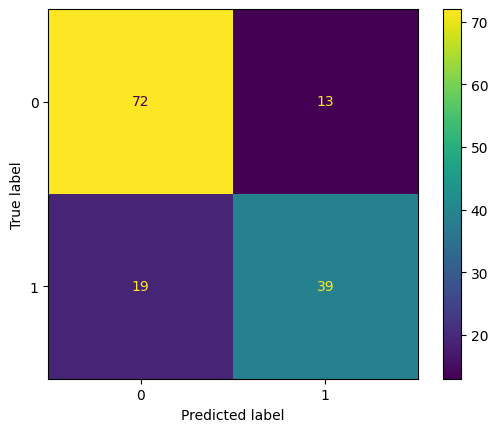

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


# Make Predictions on new data

## Create a new passenger and predict survivability

In [42]:
column_names = list(X.columns)
column_names

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male']

In [49]:
new_data = [
    3, # Pclass,
    13, # Age
    0, # Sibsp
    2, # Parch
    20, # Fare
    0, # Female
    1, # Male
]
new_record = pd.DataFrame(data=[new_data], columns=column_names)

In [50]:
new_record

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,13,0,2,20,0,1


In [51]:
new_pred = model.predict(new_record)
new_pred

array([0])